In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
import warnings
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud 

from transformers import BertModel, TransfoXLTokenizer, TransfoXLModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional, LSTM, LayerNormalization, MultiHeadAttention,Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from transformers import TFDistilBertModel, DistilBertTokenizer, BertTokenizer, TFBertModel,create_optimizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Attention

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc, roc_auc_score, classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

import torch
from tcn import TCN


warnings.filterwarnings('ignore')

c:\Users\sunaan\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the training and testing datasets
train_data = pd.read_csv('welfake_training_data.csv')
test_data = pd.read_csv('welfake_testing_data.csv')

In [63]:
train_data = train_data[train_data['text'] != 'Vice President Kamala Harris â€œeven wants to legalize fentanyl. Former President Donald Trump vowed to stop fentanyl from pouring into the United States and said Vice President Kamala Harris has the opposite approach. "Kamala is so radical she even wants to legalize fentanyl," Trump said Sept. 29 in Erie, Pennsylvania. A day earlier in Prairie du Chien, Wisconsin, Trump went further: "She\'s so radical she even wants to legalize fentanyl right away." We looked at Harrisâ€™ record, including her time as vice president and 2024 presidential candidate, and she has not called to "legalize" fentanyl. The first thing to know is that fentanyl is legal as a pain management drug when prescribed by a doctor. But possession of fentanyl without a prescription or trafficking of the drug is a crime. Fentanyl is a Schedule 2 drug, which means it has an accepted medical use when prescribed or administered appropriately but has high abuse potential. The U.S. Drug Enforcement Administration said fentanyl is "about 100 times more potent" than morphine. The Biden-Harris administration proposed making fentanyl-related substances a Schedule 1 drug, which would mean stiffer penalties for possession and distribution. Illicit fentanyl is often smuggled into the country through legal ports of entry, PolitiFact has reported. The federal National Institute on Drug Abuse also say some drug dealers mix fentanyl with other drugs, such as heroin, cocaine and methamphetamine to increase potency, which can increase the risks of a lethal overdose. There were 107,543 total drug overdose deaths in 2023, an estimated 74,702 of which involved fentanyl, recent government data shows. A Trump spokesperson said the former president was referring to Harrisâ€™ response to a 2019 questionnaire by the American Civil Liberties Union in which she said she supported federally decriminalizing drug possession for personal use. The question, and her answer, did not mention fentanyl. Trump said that Harris wants to "legalize" fentanyl, but the ACLU questionnaire asked about "decriminalization." Those words have different meanings. Decriminalization means that someone would not face criminal charges for illegal possession, but could face penalties, such as a fine. When people use "decriminalization" without specifics, it generally refers to possessing a small amount of a drug for personal use. There could still be rules after legalizing a drug, such as only adults can buy it. Harris told the ACLU she was in favor of legalization, but singled out marijuana When she responded to the ACLU questionnaire about criminal justice issues, Harris was a U.S. senator from California running in the Democratic presidential primary. The 2019 ACLU survey prefaced a question about drugs with a discussion of racial disparities in drug arrests and incarceration rates. The ACLU wrote that "the opioid crisis has reaffirmed the failure of criminalization," and "full decriminalization with appropriate treatment responses could address this stark racial injustice and reduce incarceration." The question said: "Since drug use is better addressed as a public health issue (through treatment and other programming), will you support the decriminalization at the federal level of all drug possession for personal use?" Harris marked the "yes" box. She added a written reply focused on marijuana. "I have co-sponsored the Marijuana Justice Act, which would legalize marijuana and believe it is long past time that we changed our outdated and discriminatory criminalization of marijuana. And throughout my career, I have supported treating drug addiction as a public health issue, focusing on rehabilitation over incarceration for drug-related offenses. Both of my Back-on-Track programs made it a priority to connect individuals with substance abuse treatment as part of diversion and re-entry programming," Harris wrote. The Harris campaign did not comment for this fact-check. But before the Sept. 10 Harris-Trump debate in Philadelphia, Fox News asked Harris campaign spokesperson Michael Tyler about her answer to the ACLU questionnaire. The reporter didnâ€™t mention her reply on drugs, but referred to transgender surgery for migrants in federal custody and "a lot of other things that were pretty far left." Tyler replied, "That questionnaire is not what she is proposing, it is not what she is running on." Tyler didnâ€™t mention drugs specifically, but said that on immigration she supported the bipartisan border security bill. The Trump campaign also pointed to comments by CNN KFile reporter Andrew Kaczynski, who surfaced Harrisâ€™ responses on the ACLU questionnaire. Kaczynski said in a Sept. 10 interview that Harrisâ€™ answer on decriminalization raised questions. "Now, what would that mean? Will it mean the federal, all drug possession, that\'s not just marijuana, which she alluded to in her answer to this question, but it also would mean â€¦ fentanyl, crack, you know, cocaine." Harris opened herself up to these questions by checking "yes" for decriminalizing all drugs. Another 2020 Democratic presidential candidate, U.S. Rep. Tim Ryan of Ohio, had a similar position on marijuana but, unlike Harris, checked']

In [3]:
# Preprocess training data
train_data.fillna(' ', inplace=True)
train_features = train_data[['text', 'title']]
train_labels = train_data['label']

# Preprocess testing data
test_data.fillna(' ', inplace=True)
test_features = test_data[['text', 'title']]
test_labels = test_data['label']

In [4]:
train_data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [5]:
import nltk
# Text Preprocessing and Lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
stopword = set(stopwords.words('english'))

lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunaan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:

def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc)
    
    # Remove stopwords
    words = [word for word in clean_words.split() if word.lower() not in stopword]
    
    # Lemmatization
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

In [7]:
# Apply text preprocessing to both text and title columns
train_data['text'] = train_data['text'].apply(preprocess_text)
train_data['title'] = train_data['title'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)
test_data['title'] = test_data['title'].apply(preprocess_text)

In [8]:
# BERT Tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bt_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [9]:
# Tokenize and encode sequences for both text and title
def encode_texts(texts, titles, bt_tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text, title in zip(texts, titles):
        combined_text = text + " " + title  # Concatenate title and text
        encoded = bt_tokenizer.encode_plus(
            combined_text,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='tf',
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)

In [10]:
# Encode training and testing data (title + text)
x_train_ids, x_train_masks = encode_texts(train_data['text'], train_data['title'], bt_tokenizer, max_length=128)
x_test_ids, x_test_masks = encode_texts(test_data['text'], test_data['title'], bt_tokenizer, max_length=128)


In [11]:
# # BERT-TCN Model
# def create_bert_tcn_model(sequence_length=128, dropout_rate=0.3):
#     input_ids = Input(shape=(sequence_length,), dtype=tf.int32, name='input_ids')
#     attention_masks = Input(shape=(sequence_length,), dtype=tf.int32, name='attention_masks')

#     bert_output = bert_model(input_ids, attention_mask=attention_masks)
#     sequence_output = bert_output.last_hidden_state

#     # TCN layer
#     tcn = TCN(128, dilations=[1, 2, 4], return_sequences=True, activation='relu')(sequence_output)
#     tcn = LayerNormalization()(tcn)
#     tcn = Dropout(dropout_rate)(tcn)
#     tcn = TCN(64, dilations=[1, 2, 4], return_sequences=True, activation='relu')(tcn)
#     tcn = LayerNormalization()(tcn)
#     tcn = Dropout(dropout_rate)(tcn)
#     tcn = GlobalMaxPooling1D()(tcn)

#     # Dropout and Dense layers
#     output = Dense(1, activation='sigmoid')(tcn)

#     model = Model(inputs=[input_ids, attention_masks], outputs=output)
#     return model

# # Create the BERT-TCN model
# model = create_bert_tcn_model(sequence_length=128)

# # Learning rate scheduler and optimizer
# steps_per_epoch = len(train_data) // 16
# num_train_steps = steps_per_epoch * 5  # 3 epochs
# optimizer, lr_schedule = create_optimizer(
#     init_lr=5e-5, num_train_steps=num_train_steps, num_warmup_steps=0
# )

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

# BERT-TCN Model definition
def create_bert_tcn_model(sequence_length=128, dropout_rate=0.3):
    input_ids = Input(shape=(sequence_length,), dtype=tf.int32, name='input_ids')
    attention_masks = Input(shape=(sequence_length,), dtype=tf.int32, name='attention_masks')

    bert_output = bert_model(input_ids, attention_mask=attention_masks)
    sequence_output = bert_output.last_hidden_state

    # TCN layers
    tcn = TCN(128, dilations=[1, 2, 4], return_sequences=True, activation='relu')(sequence_output)
    tcn = LayerNormalization()(tcn)
    tcn = Dropout(dropout_rate)(tcn)
    tcn = TCN(64, dilations=[1, 2, 4], return_sequences=True, activation='relu')(tcn)
    tcn = LayerNormalization()(tcn)
    tcn = Dropout(dropout_rate)(tcn)
    tcn = GlobalMaxPooling1D()(tcn)

    # Output layer
    output = Dense(1, activation='sigmoid')(tcn)

    model = Model(inputs=[input_ids, attention_masks], outputs=output)
    return model

# Create the BERT-TCN model
model = create_bert_tcn_model(sequence_length=128)

# Learning rate scheduler and optimizer
steps_per_epoch = len(train_data) // 12
num_train_steps = steps_per_epoch * 5  # 5 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=5e-5, num_train_steps=num_train_steps, num_warmup_steps=0
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [12]:
# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model3.h5', save_best_only=True, monitor='val_loss')


In [ ]:
# Train the model
history = model.fit(
    [x_train_ids, x_train_masks],
    train_labels,
    validation_split=0.1,
    epochs=5,
    batch_size=12,
    callbacks=[early_stopping, model_checkpoint]
)

In [24]:
model.save('best_model2.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate([x_test_ids, x_test_masks], test_labels)
print(f"Test Accuracy: {test_acc}")

## 2

In [2]:
import pandas as pd

# Load the existing dataset
data = pd.read_csv('WELFake_Dataset.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)



In [ ]:
train_data.to_csv('welfake_training_data.csv', index=False)
test_data.to_csv('welfake_testing_data.csv', index=False)

In [6]:
import pandas as pd

# Load the existing dataset
data = pd.read_csv('welfake_training_data.csv')
# data.drop('Unnamed: 0', axis=1, inplace=True)

data.head(10)

,text,label,title
0,Sean Colarossi Mon Oct 31st 2016 847 pm medium...,1,NaN
1,PHOENIX Reuters judge Tuesday tossed legal cha...,0,NaN
2,Analysts across political spectrum may odds th...,0,NaN
3,Home US Happened Tim Kaine Rally BAD NEWS Hill...,1,NaN
4,Oakland Athletics catcher Bruce Maxwell took k...,1,NaN
5,Algemeiner report “When come great challenge f...,0,NaN
6,ROME Reuters Italian Prime Minister Matteo Ren...,0,NaN
7,Share Facebook Many u time calling white natio...,1,NaN
8,Hillary Clinton Obama need take responsibility...,1,NaN
9,WASHINGTON Reuters Republican plan backed Pres...,0,NaN


In [7]:
data.isnull().sum()

text       613
label        0
title    57726
dtype: int64

In [8]:
missing_values_rows = data.isnull().any(axis=1)
print("Rows with Missing Values:")
print(missing_values_rows)

Rows with Missing Values:
0        True
1        True
2        True
3        True
4        True
         ... 
57721    True
57722    True
57723    True
57724    True
57725    True
Length: 57726, dtype: bool


In [9]:
data.fillna(' ', inplace=True)
features = data[['text']]
# features = data[['title', 'text']]
data.isnull().sum()


In [10]:
data.isnull().sum()

text     0
label    0
title    0
dtype: int64

In [11]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

colors = px.colors.qualitative.Alphabet

figure = px.pie(data, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="Label Distribution",
             color_discrete_sequence=colors)

figure.update_layout(height=400, width=400, title_font_size=14, title_font_color = 'black')
figure.show()

In [8]:
# word frequency analysis
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

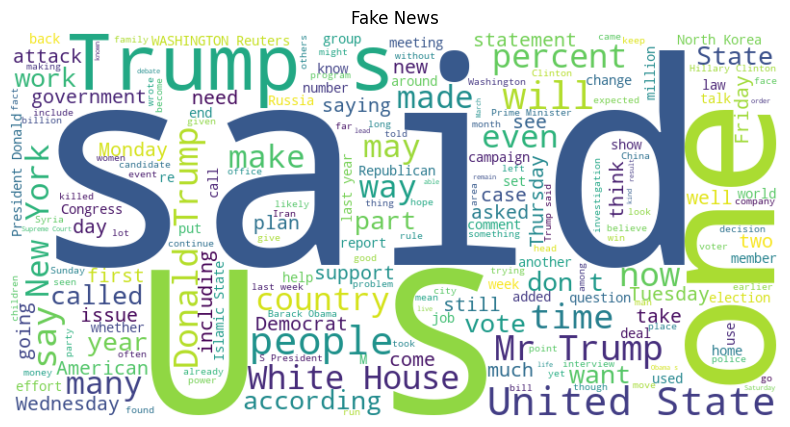

In [9]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

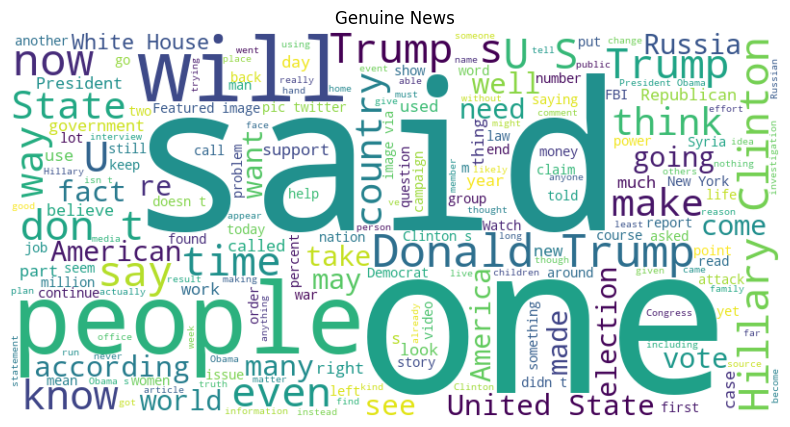

In [44]:
plot_wordcloud(real_text, 'Genuine News')
plt.show()

# Step 5: Text preprocessing

In [9]:
import nltk
nltk.download('stopwords')
stopword = set(stopwords.words('english')) 
stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining
    
    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text


In [12]:
data['text'] = data['text'].apply(preprocess_text)

In [13]:
data['text']

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

# Step 6: Lemmatization

In [14]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data['text'] = data['text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunaan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
data['text']

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

In [16]:
x = data['text']
y = data['label']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  

In [18]:
# BERT-TCN model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bt_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [19]:
import tensorflow as tf
# Tokenize and encode sequences
def encode_texts(texts, bt_tokenizer, max_length=64): #distilbert_tokenizer
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = bt_tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='tf',
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.concat(input_ids, axis=0), tf.concat(attention_masks, axis=0)


In [20]:
x_train_ids, x_train_masks = encode_texts(x_train, bt_tokenizer, max_length=128)
x_test_ids, x_test_masks = encode_texts(x_test, bt_tokenizer, max_length=128)

## BERT-LSTM

In [ ]:
# Define the BERT-Lstm model
def create_bert_lstm_model(sequence_length=128):
    input_ids = Input(shape=(sequence_length,), dtype=tf.int32, name='input_ids')
    attention_masks = Input(shape=(sequence_length,), dtype=tf.int32, name='attention_masks')

    # Extract BERT embeddings
    bert_output = bert_model(input_ids, attention_mask=attention_masks)
    sequence_output = bert_output.last_hidden_state

    # LSTM layer
    lstm_output = Bidirectional(LSTM(32, return_sequences=True))(sequence_output)
    lstm_output = Bidirectional(LSTM(32))(lstm_output)

    # conv_output = Conv1D(64,kernel_size = 3,  activation='relu')(sequence_output)
    pool_output = GlobalMaxPooling1D()(lstm_output)

    # Add dropout and dense layers
    dropout = Dropout(0.2)(pool_output)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=[input_ids, attention_masks], outputs=output)
    return model

# Create the model
model = create_bert_lstm_model(sequence_length=64)

# Learning rate scheduler and optimizer
steps_per_epoch = len(x_train) // 16
num_train_steps = steps_per_epoch * 3  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=5e-5, num_train_steps=num_train_steps, num_warmup_steps=0
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


## BERT-TCN

In [21]:
# Define the BERT-TCN model
def create_bert_tcn_model(sequence_length=128, dropout_rate=0.3):
    input_ids = Input(shape=(sequence_length,), dtype=tf.int32, name='input_ids')
    attention_masks = Input(shape=(sequence_length,), dtype=tf.int32, name='attention_masks')

    bert_output = bert_model(input_ids, attention_mask=attention_masks)
    sequence_output = bert_output.last_hidden_state

    # TCN layer
    tcn = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = 'relu')(sequence_output)
    tcn = LayerNormalization()(tcn)
    tcn = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = 'relu')(tcn)
    tcn = LayerNormalization()(tcn)
    tcn = GlobalMaxPooling1D()(tcn)

    # Dropout and Dense layers
    dropout = Dropout(dropout_rate)(tcn)
    output = Dense(1, activation='sigmoid')(dropout)

    model = Model(inputs=[input_ids, attention_masks], outputs=output)
    return model

# Create the model
model = create_bert_tcn_model(sequence_length=128)

# Learning rate scheduler and optimizer
steps_per_epoch = len(x_train) // 16
num_train_steps = steps_per_epoch * 3  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=5e-5, num_train_steps=num_train_steps, num_warmup_steps=0
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [22]:
# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [23]:
history = model.fit(
    [x_train_ids, x_train_masks],
    y_train,
    validation_split=0.1,
    epochs=3,
    batch_size=8,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/3
6492/6492 [==============================] - 1011s 152ms/step - loss: 0.1320 - accuracy: 0.9509 - val_loss: 0.0606 - val_accuracy: 0.9797
Epoch 2/3
6492/6492 [==============================] - 931s 143ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0526 - val_accuracy: 0.9827
Epoch 3/3
6492/6492 [==============================] - 983s 151ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0526 - val_accuracy: 0.9827


451/451 [==============================] - 81s 180ms/step - loss: 0.0516 - accuracy: 0.9845
Test Loss: 0.05164201557636261, Test Accuracy: 0.9844735860824585
451/451 [==============================] - 83s 173ms/step


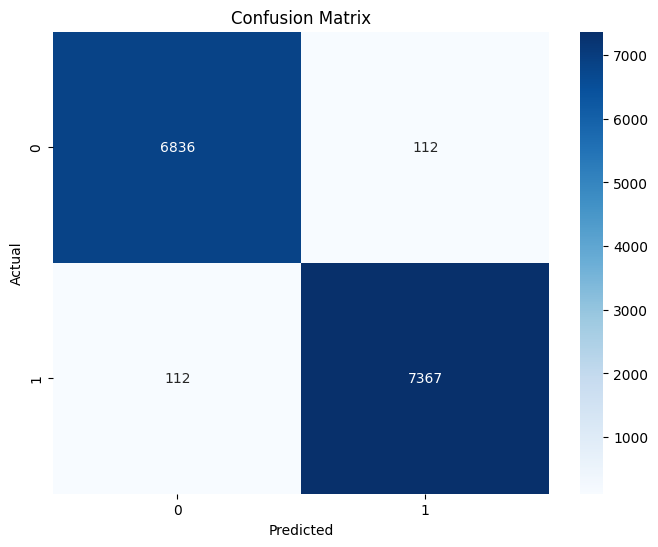

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6948
           1       0.99      0.99      0.99      7479

    accuracy                           0.98     14427
   macro avg       0.98      0.98      0.98     14427
weighted avg       0.98      0.98      0.98     14427



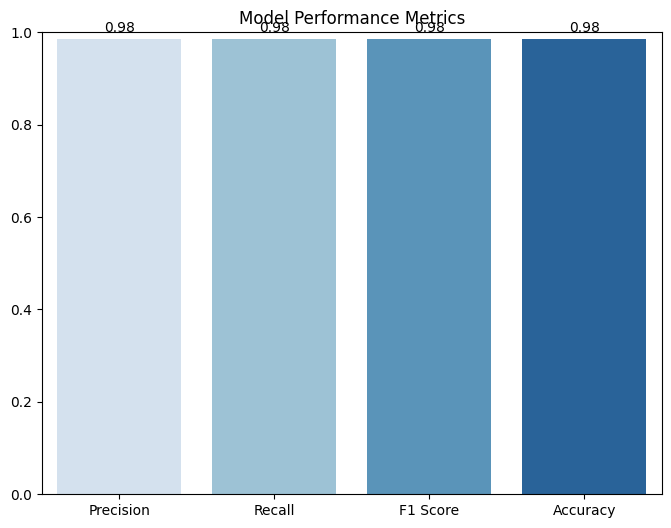

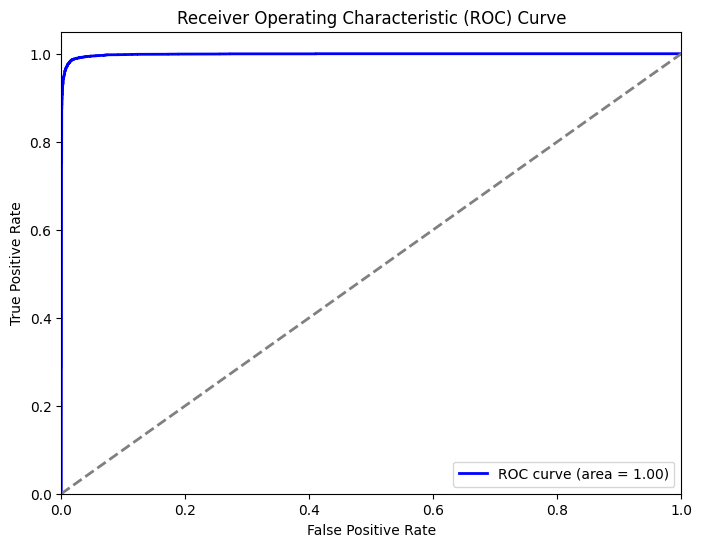

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model
results = model.evaluate([x_test_ids, x_test_masks], y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Predictions and confusion matrix
y_pred_proba = model.predict([x_test_ids, x_test_masks])
y_pred = (y_pred_proba > 0.5).astype("int32")
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extract metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']
accuracy = accuracy_score(y_test, y_pred)

# Metrics visualization
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


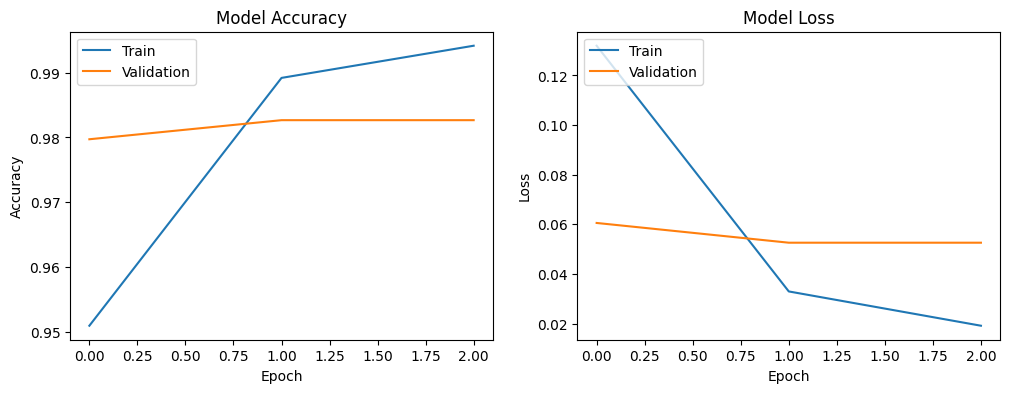

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [26]:
model.save('bert_transformer_attention_model.h5')

## 3

In [44]:
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

In [ ]:
train_data.to_csv('fakeddit_training_data.csv', index=False)
test_data.to_csv('fakeddit_testing_data.csv', index=False)

In [ ]:
train_data.to_csv('politifact_training_data.csv', index=False)
test_data.to_csv('politifact_testing_data.csv', index=False)

In [45]:
train_data.to_csv('welfake_training_data.csv', index=False)
test_data.to_csv('welfake_testing_data.csv', index=False)

In [18]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [47]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfvect, f)

# Step 09: Evaluate models

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve, auc
def evaluate_model(model, tfid_x_test, y_test):
    y_pred = model.predict(tfid_x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    prob = model.predict_proba(tfid_x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, prob)
    
    # Convert labels to numeric values
    label_encoder = LabelEncoder()
    ytest_encoded = label_encoder.fit_transform(y_test)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(ytest_encoded, prob)
    precision, recall, _ = precision_recall_curve(ytest_encoded, prob)
    pr_auc = auc(recall, precision)
    
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'ROC AUC': roc_auc,
        'ROC Curve': (fpr, tpr),
        'Precision-Recall AUC': pr_auc
    }

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier

classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)


PassiveAggressiveClassifier(max_iter=50)

In [21]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.66%


In [22]:
cf = confusion_matrix(y_test,y_pred, labels=[0,1])
print(cf)

[[6694  254]
 [ 228 7251]]


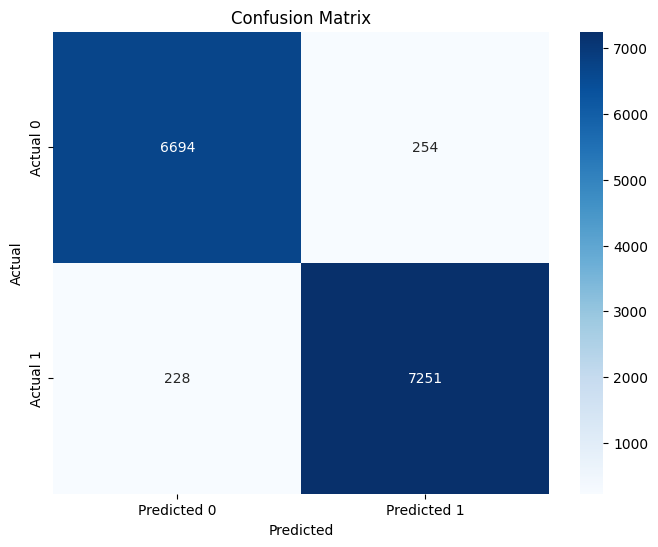

In [23]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(classification_report(y_test, classifier.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6948
           1       0.97      0.97      0.97      7479

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



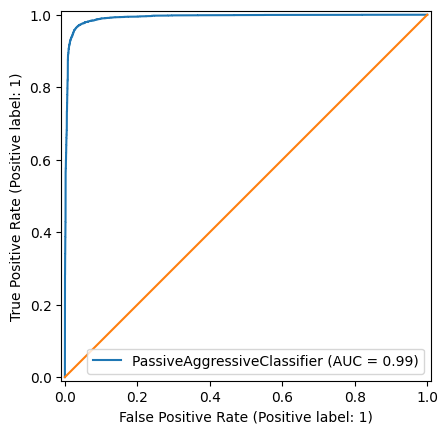

In [25]:
RocCurveDisplay.from_estimator(classifier, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

In [26]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [ ]:
import pickle
pickle.dump(classifier,open('passive_classifier_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('passive_classifier_model.pkl', 'rb'))

In [ ]:
# Use the loaded model for prediction
y_pred_loaded_model = loaded_model.predict(tfid_x_test)
score_loaded_model = accuracy_score(y_test, y_pred_loaded_model)
print(f'Accuracy with loaded model: {round(score_loaded_model*100, 2)}%')

# Step 10: Build Naive Bayes models

# Multinomial Naive Bayes

In [33]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(tfid_x_train, y_train)

MultinomialNB()

In [34]:
from sklearn.metrics import precision_recall_curve, auc

In [44]:
nb_results = evaluate_model(mnb_model, tfid_x_test, y_test)
nb_results

{'Accuracy': 0.8741249046925903,
 'Confusion Matrix': array([[6355,  593],
        [1223, 6256]], dtype=int64),
 'ROC AUC': 0.9482306358783292,
 'ROC Curve': (array([0.        , 0.        , 0.        , ..., 0.96042026, 0.96070812,
         1.        ]),
  array([0.00000000e+00, 1.33707715e-04, 2.40673887e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])),
 'Precision-Recall AUC': 0.9489216982739336}

# Evaluate Manually

In [45]:
cm = confusion_matrix(y_test, mnb_model.predict(tfid_x_test))
cm

array([[6355,  593],
       [1223, 6256]], dtype=int64)

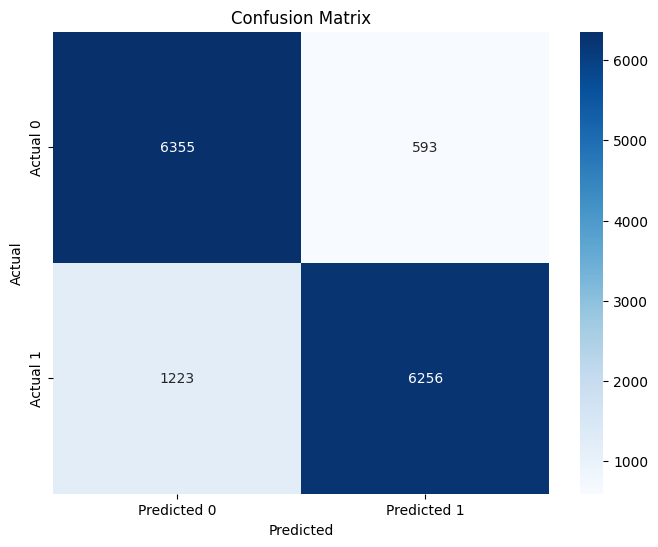

In [46]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(classification_report(y_test, mnb_model.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6948
           1       0.91      0.84      0.87      7479

    accuracy                           0.87     14427
   macro avg       0.88      0.88      0.87     14427
weighted avg       0.88      0.87      0.87     14427



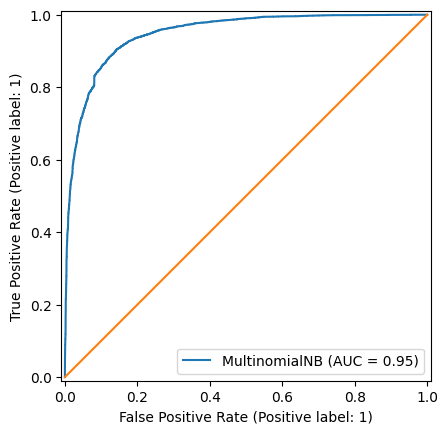

In [48]:
RocCurveDisplay.from_estimator(mnb_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

# Bernoulli Naive Bayes

In [49]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(tfid_x_train, y_train)

BernoulliNB()

In [50]:
bnb_results = evaluate_model(bnb_model, tfid_x_test, y_test)
bnb_results

{'Accuracy': 0.8650447078394676,
 'Confusion Matrix': array([[5736, 1212],
        [ 735, 6744]], dtype=int64),
 'ROC AUC': 0.9471863089611957,
 'ROC Curve': (array([0.        , 0.00316638, 0.00359816, ..., 0.99870466, 0.99870466,
         1.        ]),
  array([0.        , 0.53349378, 0.56411285, ..., 0.99973258, 1.        ,
         1.        ])),
 'Precision-Recall AUC': 0.958200484225056}

In [51]:
cm_bnb = confusion_matrix(y_test, bnb_model.predict(tfid_x_test))
cm_bnb

array([[5736, 1212],
       [ 735, 6744]], dtype=int64)

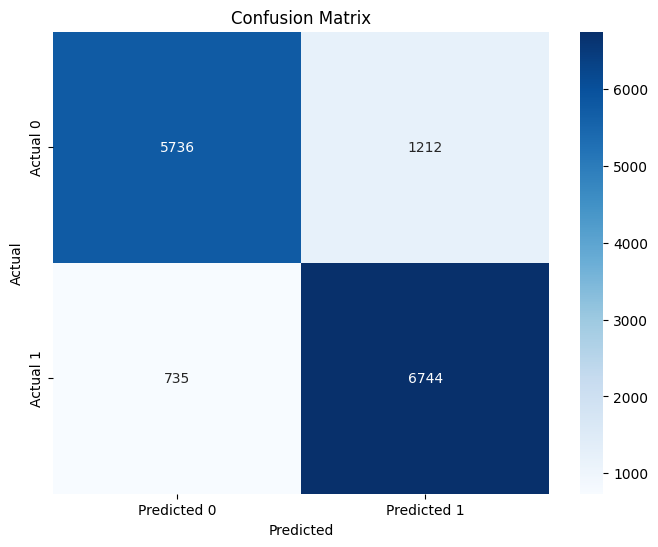

In [52]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(classification_report(y_test, bnb_model.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.85      6948
           1       0.85      0.90      0.87      7479

    accuracy                           0.87     14427
   macro avg       0.87      0.86      0.86     14427
weighted avg       0.87      0.87      0.86     14427



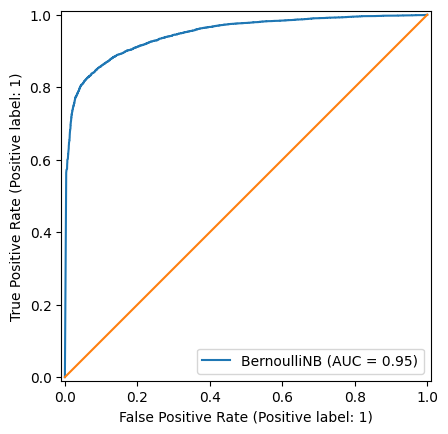

In [54]:
RocCurveDisplay.from_estimator(bnb_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

In [ ]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'bnb_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(bnb_model, model_file)


# Step 11: Apply Logistic Regression

In [55]:
#highest for fakeddit dataset
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(tfid_x_train, y_train)

LogisticRegression(max_iter=1000)

# Step 12: Evaluate Logistic Regression

In [56]:
lr_results = evaluate_model(lr_model, tfid_x_test, y_test)

In [57]:
lr_results

{'Accuracy': 0.9521730089415679,
 'Confusion Matrix': array([[6521,  427],
        [ 263, 7216]], dtype=int64),
 'ROC AUC': 0.9889558543618928,
 'ROC Curve': (array([0.        , 0.        , 0.        , ..., 0.9945308 , 0.99481865,
         1.        ]),
  array([0.00000000e+00, 1.33707715e-04, 1.20336943e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])),
 'Precision-Recall AUC': 0.9888729246050947}

In [58]:
cm_lr = confusion_matrix(y_test, lr_model.predict(tfid_x_test))
cm_lr

array([[6521,  427],
       [ 263, 7216]], dtype=int64)

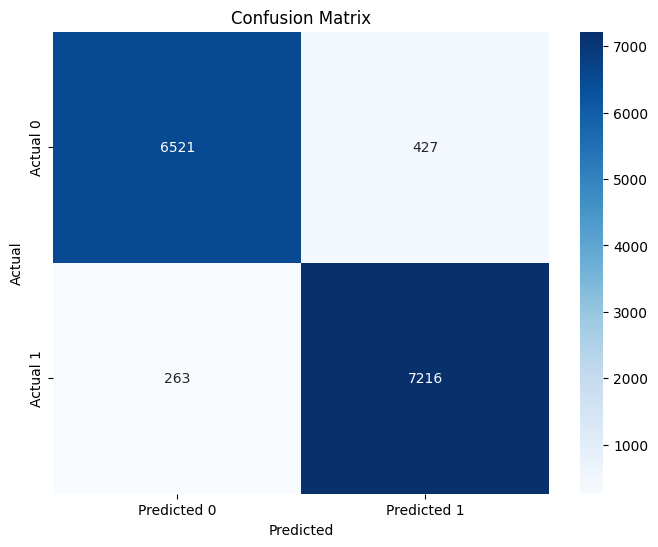

In [59]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_test, lr_model.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6948
           1       0.94      0.96      0.95      7479

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



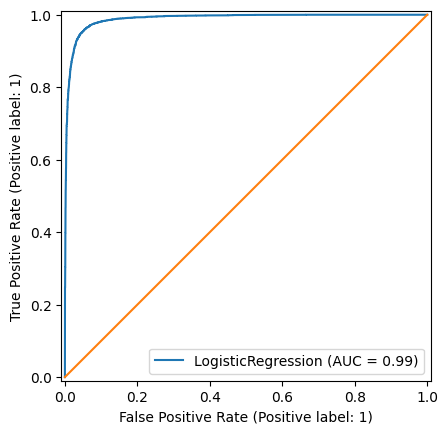

In [61]:
RocCurveDisplay.from_estimator(lr_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

In [ ]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)


In [ ]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [ ]:
loaded_LR.predict(tfid_x_test)

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'REAL', 'REAL'], dtype=object)

# Step 13: Random Forrest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Step 14: Apply Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0,verbose=3,n_jobs=-1)
rf_model.fit(tfid_x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(n_jobs=-1, random_state=0, verbose=3)

In [63]:
rf_results = evaluate_model(rf_model, tfid_x_test, y_test)
rf_results

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


{'Accuracy': 0.9392805156997297,
 'Confusion Matrix': array([[6485,  463],
        [ 413, 7066]], dtype=int64),
 'ROC AUC': 0.9854978126049042,
 'ROC Curve': (array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.43926310e-04, 1.43926310e-04, 2.87852619e-04, 2.87852619e-04,
         2.87852619e-04, 2.87852619e-04, 2.87852619e-04, 2.87852619e-04,
         2.87852619e-04, 2.87852619e-04,

In [64]:
cm_rf = confusion_matrix(y_test, rf_model.predict(tfid_x_test))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


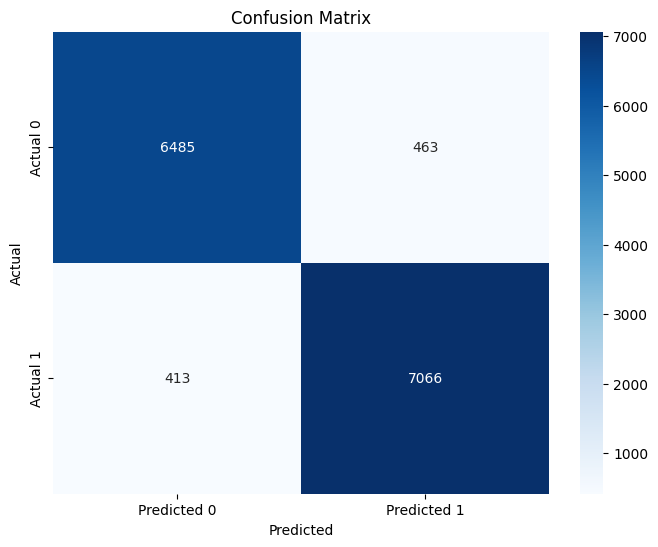

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test, rf_model.predict(tfid_x_test)))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6948
           1       0.94      0.94      0.94      7479

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


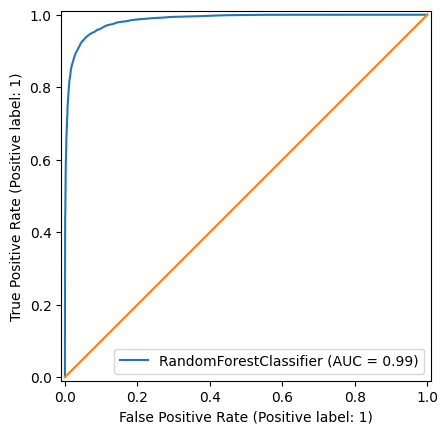

In [67]:
RocCurveDisplay.from_estimator(rf_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

# Step 14: Evaluate Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_model.fit(tfid_x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

In [ ]:
# # Create a GridSearchCV object
# dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0, max_depth=3), param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# # Perform grid search on the training data
# dt_grid_search.fit(tfid_x_train, y_train)

In [ ]:
# # Get the best parameters and best score
# best_params = dt_grid_search.best_params_
# best_score = dt_grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

In [69]:
dt_results = evaluate_model(dt_model, tfid_x_test, y_test)
dt_results
# best_dt_model = dt_grid_search.best_estimator_
# dt_results_tuned = evaluate_model(best_dt_model, tfid_x_test, y_test)
# dt_results_tuned

{'Accuracy': 0.8728079295764886,
 'Confusion Matrix': array([[5397, 1551],
        [ 284, 7195]], dtype=int64),
 'ROC AUC': 0.8779104905749149,
 'ROC Curve': (array([0.        , 0.        , 0.22322971, 0.24496258, 0.3408175 ,
         0.38629822, 1.        ]),
  array([0.        , 0.00147078, 0.96202701, 0.97847306, 0.98743147,
         0.98836743, 1.        ])),
 'Precision-Recall AUC': 0.9052970330362451}

In [70]:
cm_dt = confusion_matrix(y_test, dt_model.predict(tfid_x_test))
# cm_dt_tuned = confusion_matrix(y_test, best_dt_model.predict(tfid_x_test))

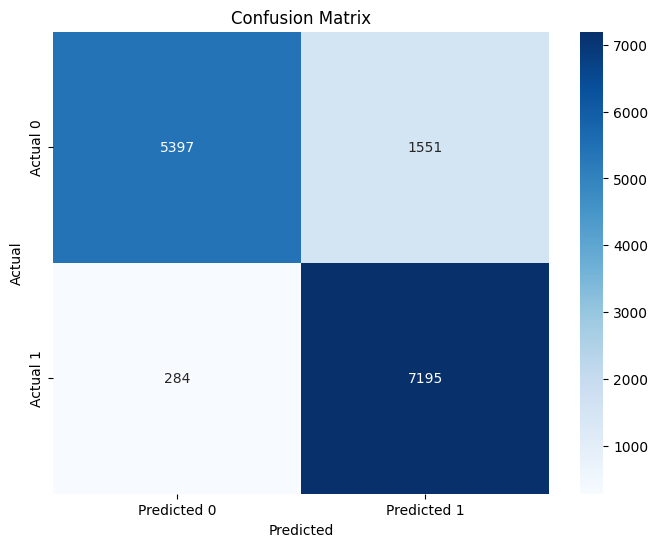

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
print(classification_report(y_test, dt_model.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      6948
           1       0.82      0.96      0.89      7479

    accuracy                           0.87     14427
   macro avg       0.89      0.87      0.87     14427
weighted avg       0.88      0.87      0.87     14427



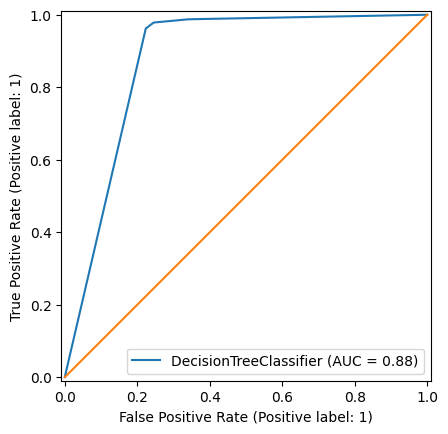

In [73]:
RocCurveDisplay.from_estimator(dt_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

In [ ]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'DT_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(dt_model, model_file)

# Step 14: Evaluate Gradient Boosting Classifier

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# # Define the parameter grid to search
# param_distributions = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Step: Apply Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
gb_model.fit(tfid_x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=0)

In [ ]:
# gb_random_search = RandomizedSearchCV(
#     GradientBoostingClassifier(random_state=0),
#     param_distributions,
#     n_iter=10,  
#     cv=3,       # Number of cross-validation folds
#     scoring='accuracy',
#     random_state=42,
#     n_jobs = -1
# )

# # Perform randomized search on the training data
# gb_random_search.fit(tfid_x_train, y_train)


In [ ]:
# best_params_random = gb_random_search.best_params_
# best_score_random = gb_random_search.best_score_

# print("Best Parameters (Randomized Search):", best_params_random)
# print("Best Score (Randomized Search):", best_score_random)

In [90]:
# best_gb_model_random = gb_random_search.best_estimator_
gb_results = evaluate_model(gb_model, tfid_x_test, y_test)
gb_results

{'Accuracy': 0.9480834546336729,
 'Confusion Matrix': array([[6492,  456],
        [ 293, 7186]], dtype=int64),
 'ROC AUC': 0.9835067453887196,
 'ROC Curve': (array([0.00000000e+00, 5.75705239e-04, 5.75705239e-04, ...,
         9.99280368e-01, 9.99712147e-01, 1.00000000e+00]),
  array([0.00000000e+00, 2.67415430e-04, 9.35954005e-04, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])),
 'Precision-Recall AUC': 0.9774366084797008}

In [91]:
cm_gb_tuned_random = confusion_matrix(y_test, gb_model.predict(tfid_x_test))

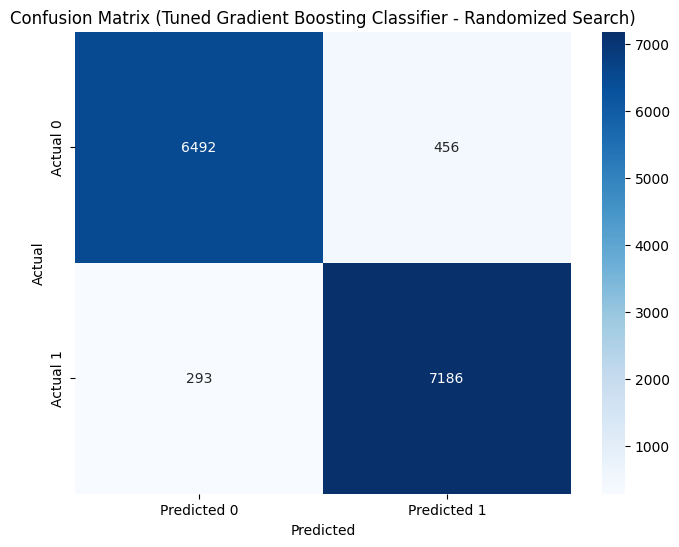

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb_tuned_random, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Gradient Boosting Classifier - Randomized Search)')
plt.show()

In [93]:
print(classification_report(y_test, gb_model.predict(tfid_x_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6948
           1       0.94      0.96      0.95      7479

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



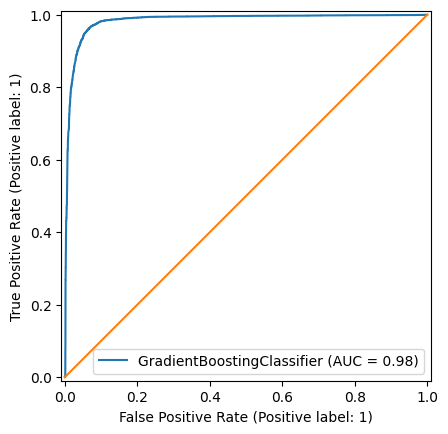

In [94]:
RocCurveDisplay.from_estimator(gb_model, tfid_x_test, y_test)
plt.plot([0,1],[0,1])

In [ ]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'GB_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(gb_model, model_file)

# Step 15: Visualize performance with histogram

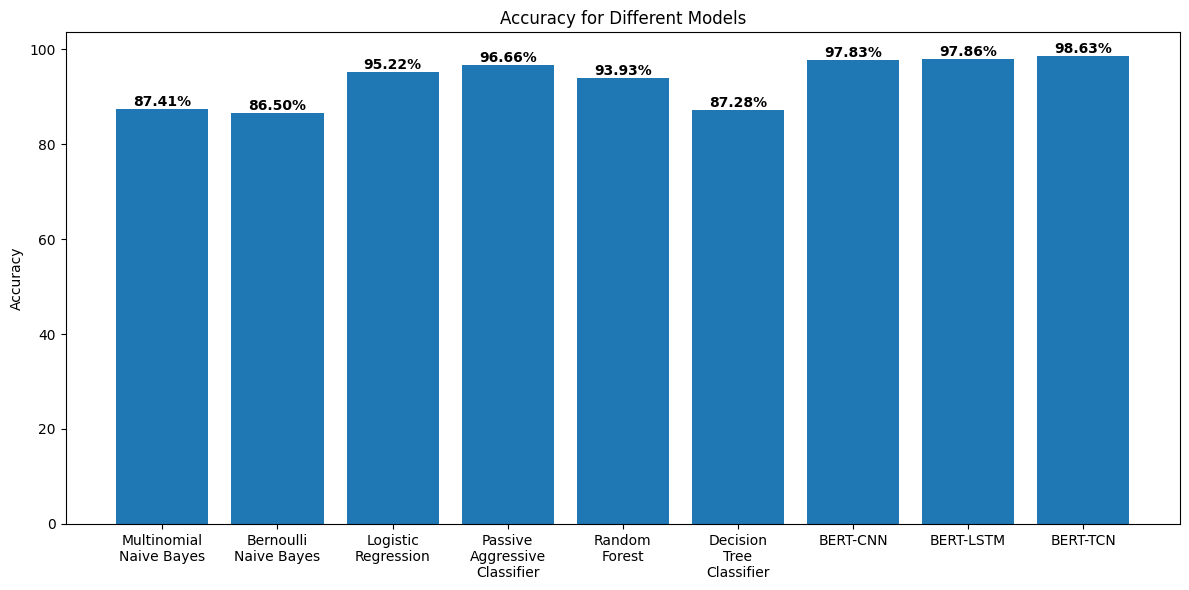

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def plot_histogram(metric_values, model_names, metric_name):
    # Convert accuracy values to percentage
    metric_values = [value * 100 for value in metric_values]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = plt.bar(model_names, metric_values)
    
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Update the x-tick labels with new lines for better readability
    ax.set_xticklabels(model_names, rotation=0, ha='center')  # No rotation, centered
    
    plt.tight_layout()
    plt.show()

accuracy_pa = accuracy_score(y_test, classifier.predict(tfid_x_test))
accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy'], accuracy_pa]

# Update model names with newline characters
model_names = [
    'Multinomial\nNaive Bayes', 'Bernoulli\nNaive Bayes', 'Logistic\nRegression', 
    'Passive\nAggressive\nClassifier'
]
accuracy_values.append(rf_results['Accuracy'])
model_names.append('Random\nForest')
accuracy_values.append(dt_results['Accuracy'])
model_names.append('Decision\nTree\nClassifier')

# Adding BERT models
accuracy_values.extend([0.9783, 0.9786, 0.9863])
model_names.extend(['BERT-CNN', 'BERT-LSTM', 'BERT-TCN'])

plot_histogram(accuracy_values, model_names, 'Accuracy')


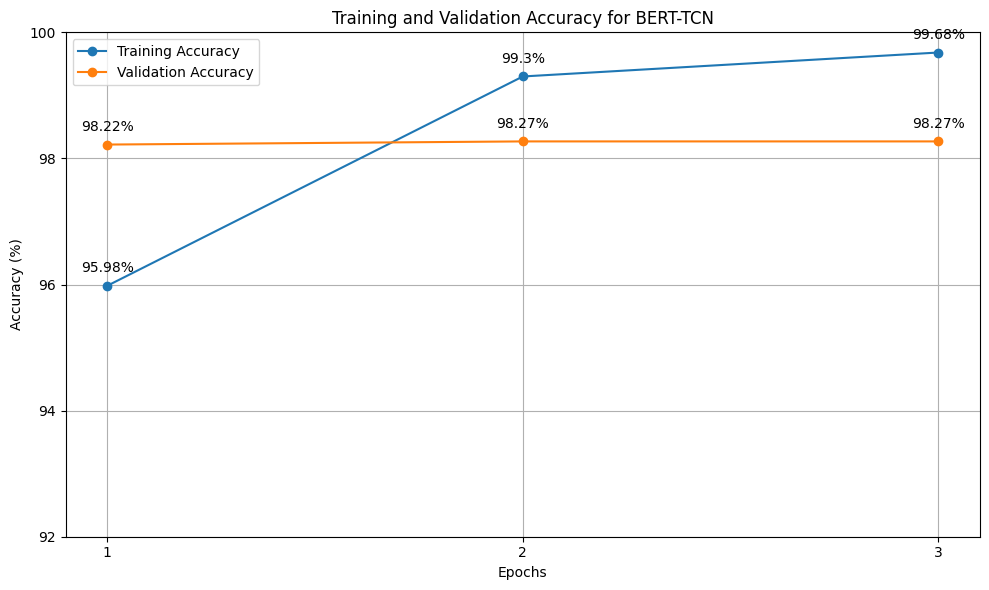

In [93]:
import matplotlib.pyplot as plt

# Data for BERT-CNN model
epochs = [1, 2, 3]
training_accuracy = [95.98, 99.30, 99.68]
validation_accuracy = [98.22, 98.27, 98.27]

def plot_accuracies(epochs, training_acc, validation_acc):
    plt.figure(figsize=(10, 6))
    
    plt.plot(epochs, training_acc, marker='o', label='Training Accuracy', color='#1f77b4')
    plt.plot(epochs, validation_acc, marker='o', label='Validation Accuracy', color='#ff7f0e')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy for BERT-TCN')
    plt.xticks(epochs)
    plt.yticks([90, 92, 94, 96, 98, 100])
    plt.ylim(92, 100)  # Set y-axis range for better visualization
    plt.legend()
    
    # Add data labels
    for i, txt in enumerate(training_acc):
        plt.annotate(f'{txt}%', (epochs[i], training_acc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(validation_acc):
        plt.annotate(f'{txt}%', (epochs[i], validation_acc[i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_accuracies(epochs, training_accuracy, validation_accuracy)


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Choose the model you want to evaluate (for example, the tuned Decision Tree Classifier)
model_to_evaluate = gb_model

# Plot learning curve
plot_learning_curve(model_to_evaluate, "Learning Curve (Tuned Decision Tree)", tfid_x_train, y_train, cv=5)
plt.show()
